In [43]:

using Latexify
using AbstractAlgebra
using LinearAlgebra
using GLMakie


In [44]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [45]:
Makie.inline!(true)

true

In [46]:
RR = RealField;
RRs, (b, m, X, Y, Ŷ, Q, R̂, U, V, W, δ, β, β̂, ℇ, Σ, ) = polynomial_ring(RR, [:b, :m, :X, :Y, :Ŷ, :Q, :R̂, :U, :V, :W, :δ, :β, :β̂, :ℇ, :Σ,])

(Multivariate polynomial ring in 15 variables over floats, AbstractAlgebra.Generic.MPoly{BigFloat}[b, m, X, Y, Ŷ, Q, R̂, U, V, W, δ, β, β̂, ℇ, Σ])

In [47]:
R, v = polynomial_ring(RRs, :v => (1:4))
R, x = polynomial_ring(R, :x => (1:4))
R, y = polynomial_ring(R, :y => (1:4))
R, ℇ = polynomial_ring(R, :ℇ => (1:4))
R, u = polynomial_ring(R, :u => (1:4))
R, w = polynomial_ring(R, :w => (1:4))

(Multivariate polynomial ring in 4 variables over multivariate polynomial ring, AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[w[1], w[2], w[3], w[4]])

In [48]:
X = R[x ones(1, 4)[:]];
Y = y;
β = [m; b];


# MULTILINEAR REGRESSION:

LEAST SQUARES

## Linear Regression

In [49]:
Y ~ m*X + b

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[y[1], y[2], y[3], y[4]] ~ [m*x[1]+b m; m*x[2] b+m; m*x[3] m; m*x[4] m]

In [50]:
Y ~ m.*x .+ b .+ ℇ

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[y[1], y[2], y[3], y[4]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[ℇ[1] + m*x[1] + b, ℇ[2] + m*x[2] + b, ℇ[3] + m*x[3] + b, ℇ[4] + m*x[4] + b]

In [51]:
Y ~ X*β + ℇ

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[y[1], y[2], y[3], y[4]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[ℇ[1] + m*x[1] + b, ℇ[2] + m*x[2] + b, ℇ[3] + m*x[3] + b, ℇ[4] + m*x[4] + b]

In [52]:
ℇ ~ Y - X*β + ℇ

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[ℇ[1], ℇ[2], ℇ[3], ℇ[4]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[ℇ[1] + y[1] - 1.0*m*x[1] - 1.0*b, ℇ[2] + y[2] - 1.0*m*x[2] - 1.0*b, ℇ[3] + y[3] - 1.0*m*x[3] - 1.0*b, ℇ[4] + y[4] - 1.0*m*x[4] - 1.0*b]

**Gram matrix**

In [53]:
transpose(X)*X 

[x[1]^2 + x[2]^2 + x[3]^2 + x[4]^2   x[1] + x[2] + x[3] + x[4]]
[        x[1] + x[2] + x[3] + x[4]                         4.0]

**Normal equations**

In [54]:
transpose(X)*X .* β̂ ~ transpose(X)*Y  

[β̂*x[1]^2+β̂*x[2]^2+β̂*x[3]^2+β̂*x[4]^2 β̂*x[1]+β̂*x[2]+β̂*x[3]+β̂*x[4]; β̂*x[1]+β̂*x[2]+β̂*x[3]+β̂*x[4] 4.0*β̂] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[x[1]*y[1] + x[2]*y[2] + x[3]*y[3] + x[4]*y[4], y[1] + y[2] + y[3] + y[4]]

Then if gram matrix is invertable.

In [55]:
is_invertible(X)

false

Because that our extimator equation will fail but as you can see later we will be able to compute it by change the variables to numerical ones change the field where X is then invertable and have so a gram matrix.

In [56]:
β̂ ~ (transpose(X)*X)^-1 * transpose(X)*Y

DomainError: DomainError with [x[1]^2+x[2]^2+x[3]^2+x[4]^2 x[1]+x[2]+x[3]+x[4]; x[1]+x[2]+x[3]+x[4] 4.0]:
Matrix is not invertible.

But if we can have QR factorization then we will be able to still evaluate β̂ as you can see by the equations bellow.

In [57]:
transpose(Q*R̂) * Q.*R̂.*β ~ transpose(Q*R̂).*Y

AbstractAlgebra.Generic.MPoly{BigFloat}[m*Q^2*R̂^2, b*Q^2*R̂^2] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[Q*R̂*y[1], Q*R̂*y[2], Q*R̂*y[3], Q*R̂*y[4]]

In [58]:
transpose(R̂) * transpose(Q) * Q.*R̂.*β ~ transpose(R̂) * transpose(Q).*Y

AbstractAlgebra.Generic.MPoly{BigFloat}[m*Q^2*R̂^2, b*Q^2*R̂^2] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[Q*R̂*y[1], Q*R̂*y[2], Q*R̂*y[3], Q*R̂*y[4]]

In [59]:
transpose(R̂) * R̂.*β ~ transpose(R̂) * transpose(Q).*Y

AbstractAlgebra.Generic.MPoly{BigFloat}[m*R̂^2, b*R̂^2] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[Q*R̂*y[1], Q*R̂*y[2], Q*R̂*y[3], Q*R̂*y[4]]

In [60]:
R̂.*β ~ transpose(Q).*Y

AbstractAlgebra.Generic.MPoly{BigFloat}[m*R̂, b*R̂] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[Q*y[1], Q*y[2], Q*y[3], Q*y[4]]

This equations can then be evaluated as:
$$
    β = R-^1*Q^T*Y
$$

Change X and make it orthogonal.

In [61]:
Y = R[2 3 5 5];
X = R[1:4 ones(1, 4)[:]]


[  1   1]
[2.0   1]
[3.0   1]
[4.0   1]

In [62]:
Y

[2.0   3.0   5.0   5.0]

Gram matrix is now possible as X is orthogonal and invertable.

**THEOREM**

X
TX is invertible if and only if the columns of X are
linearly independent.
Here’s a logically equivalent statement:
X
TX is not invertible if and only if the columns of X
are linearly dependent.

In [63]:
transpose(X)*X

[30.0   10.0]
[10.0    4.0]

In [64]:
R[sum((transpose(X).*Y)[:1, :]) sum((transpose(X).*Y)[:2, :])]

[43.0   15.0]

In [65]:
Y ~ X * β + ℇ

[2.0 3.0 5.0 5.0] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[ℇ[1] + b + m, ℇ[2] + b + 2.0*m, ℇ[3] + b + 3.0*m, ℇ[4] + b + 4.0*m]

In [66]:
inv(transpose(X)*X)

[0.2000000000000000000000000000000000000000000000000000000000000000000000000000004   -0.5]
[                                                                             -0.5    1.5]

In [67]:
β̂ ~ inv(transpose(X)*X).*R[sum((transpose(X).*Y)[:1, :]) sum((transpose(X).*Y)[:2, :])] ~ R[1.1; 1.0]

β̂ ~ [8.600000000000000000000000000000000000000000000000000000000000000000000000000055 -7.5; -21.5 22.5] ~ [1.100000000000000088817841970012523233890533447265625; 1]

And finaly we have the regression line that will fit out data set.

In [68]:
y = 1.1*x .+ 1.0

4-element Vector{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}:
 1.100000000000000088817841970012523233890533447265625*x[1] + 1
 1.100000000000000088817841970012523233890533447265625*x[2] + 1
 1.100000000000000088817841970012523233890533447265625*x[3] + 1
 1.100000000000000088817841970012523233890533447265625*x[4] + 1

In [69]:
rl(x) = 1.1*x .+ 1.0

rl (generic function with 1 method)

In [70]:
rl([1, 2, 3, 4])

4-element Vector{Float64}:
 2.1
 3.2
 4.300000000000001
 5.4

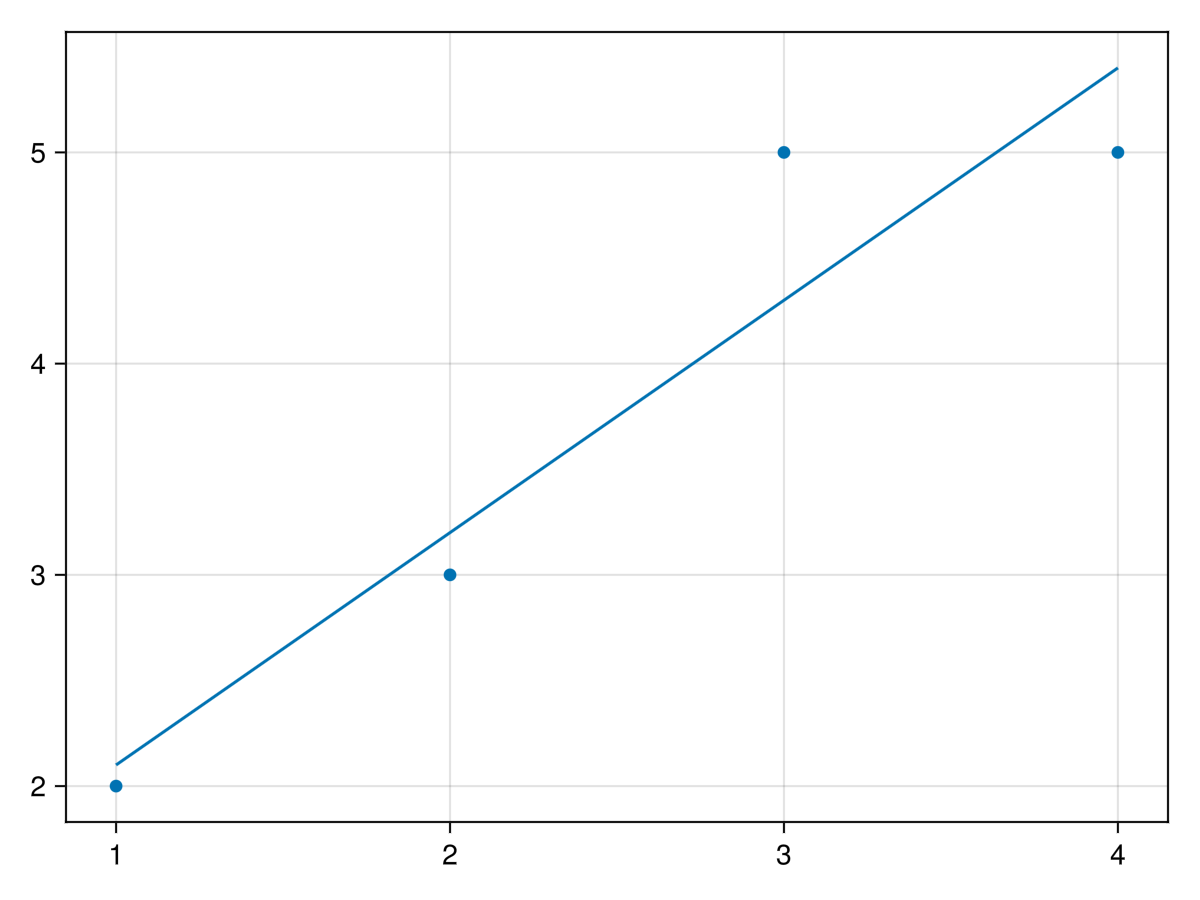

In [71]:
scatter([2, 3, 5, 5])
lines!([2.1
3.2
4.300000000000001
5.4])
current_figure()

## Multiple Linear Regression

In [72]:
X = R[ones(1, 4)[:] u v w]

[1   u[1]   v[1]   w[1]]
[1   u[2]   v[2]   w[2]]
[1   u[3]   v[3]   w[3]]
[1   u[4]   v[4]   w[4]]

In [73]:
β = R[b b*u[1] b*v[1] b*w[1]]

[b   b*u[1]   b*v[1]   b*w[1]]

We have then to add the residuals error to the product of X. 
Because this are vectors spaces we can use the associative property we will map the sum of β with ℇ.

The reason to do this hear is that we can't broadcast β .+ ℇ...

In [74]:
map(x ->  (β[x] + ℇ[x]), 1:4)

4-element Vector{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}}:
 ℇ[1] + b
 b*u[1] + ℇ[2]
 ℇ[3] + b*v[1]
 b*w[1] + ℇ[4]

Having understood what is need for the computation of a multivariable regression, we have now the fallowing equation:
$$
    Y = Xβ + ℇ
$$

In [75]:
Y ~ X * map(x ->  (β[x] + ℇ[x]), 1:4)

[2.0 3.0 5.0 5.0] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}}}[b*w[1]^2 + ℇ[4]*w[1] + b*u[1]^2 + ℇ[2]*u[1] + ℇ[1] + v[1]*ℇ[3] + b*v[1]^2 + b, b*w[1]*w[2] + ℇ[4]*w[2] + b*u[1]*u[2] + ℇ[2]*u[2] + ℇ[1] + v[2]*ℇ[3] + b*v[1]*v[2] + b, b*w[1]*w[3] + ℇ[4]*w[3] + b*u[1]*u[3] + ℇ[2]*u[3] + ℇ[1] + v[3]*ℇ[3] + b*v[1]*v[3] + b, b*w[1]*w[4] + ℇ[4]*w[4] + b*u[1]*u[4] + ℇ[2]*u[4] + ℇ[1] + v[4]*ℇ[3] + b*v[1]*v[4] + b]

## How Good Is the Fit?

In [76]:
u = map(x -> x, 1:4);
v = map(x -> x + rand(), 1:4);
w = map(x -> x * rand(), 1:4);
X = [ones(1, 4)[:] u v w];
Y = [2, 3, 5, 5];
β = R[b b*u[1] b*v[1] b*w[1]]

[b   b   1.767561366342004447460567462258040904998779296875*b   0.792361454414235222287743454216979444026947021484375*b]

With the given values and chaged the fields our a normal equation to solve for β will give us a β̂ vector extimator:

In [77]:
β̂ ~ inv(transpose(X)*X) * inv(X) .* Y

β̂ ~ [58.16475026867718 -248.48341656186525 379.4020529523586 -165.4476157896469; 148.44718203460744 -694.6893993854596 1060.0829401840538 -457.42030356804975; -130.58451097110776 624.3848012893766 -965.8226107717144 419.75922850947; -186.16864001092952 822.5125579498065 -1234.2333210494523 529.6774188065272]

In [80]:
data = [58.16475026867718 -248.48341656186525 379.4020529523586 -165.4476157896469; 148.44718203460744 -694.6893993854596 1060.0829401840538 -457.42030356804975; -130.58451097110776 624.3848012893766 -965.8226107717144 419.75922850947; -186.16864001092952 822.5125579498065 -1234.2333210494523 529.6774188065272]

4×4 Matrix{Float64}:
   58.1648  -248.483    379.402  -165.448
  148.447   -694.689   1060.08   -457.42
 -130.585    624.385   -965.823   419.759
 -186.169    822.513  -1234.23    529.677

In [78]:
ŷ = X*inv(transpose(X)*X) * transpose(X) .* Y

4×4 Matrix{Float64}:
  2.0          -3.2864e-15    9.11283e-15   6.03772e-15
  3.33277e-14   3.0          -8.42418e-14   8.79462e-14
 -1.87087e-15  -2.03626e-13   5.0          -7.9179e-14
 -1.1987e-13   -2.05306e-13  -5.25265e-13   5.0